In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pathlib import Path
from ds100_utils import fetch_and_cache
from datetime import datetime
from IPython.display import display

import random
import yaml

plt.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['figure.dpi'] = 150
sns.set()

In [8]:
# Downloads from https://www.gapminder.org/data/
cm_path = 'child_mortality_0_5_year_olds_dying_per_1000_born.csv'
fe_path = 'children_per_woman_total_fertility.csv'
cm = pd.read_csv(cm_path).set_index('country')['2017'].to_frame()/10
fe = pd.read_csv(fe_path).set_index('country')['2017'].to_frame()
data = cm.merge(fe, left_index=True, right_index=True).dropna()
data.columns = ['mortality', 'fertility']
data.head()

,mortality,fertility
country,,
Afghanistan,6.820,4.48
Albania,1.330,1.71
Algeria,2.390,2.71
Angola,8.310,5.62
Antigua and Barbuda,0.816,2.04


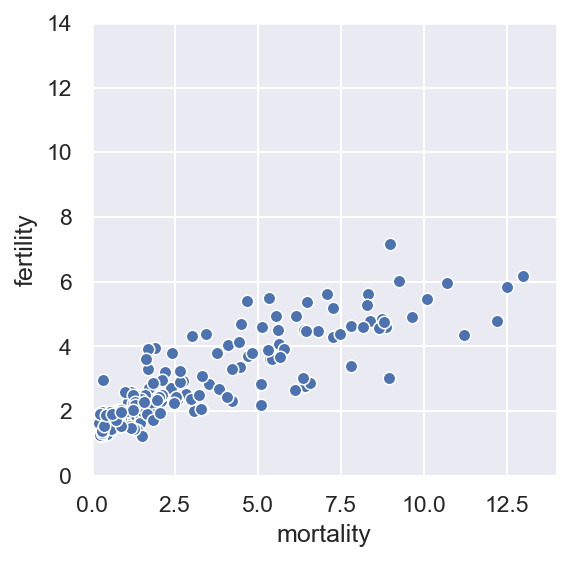

In [14]:
def scatter():
    sns.scatterplot('mortality', 'fertility', data=data)
    plt.xlim([0, 14])
    plt.ylim([0, 14])

scatter()

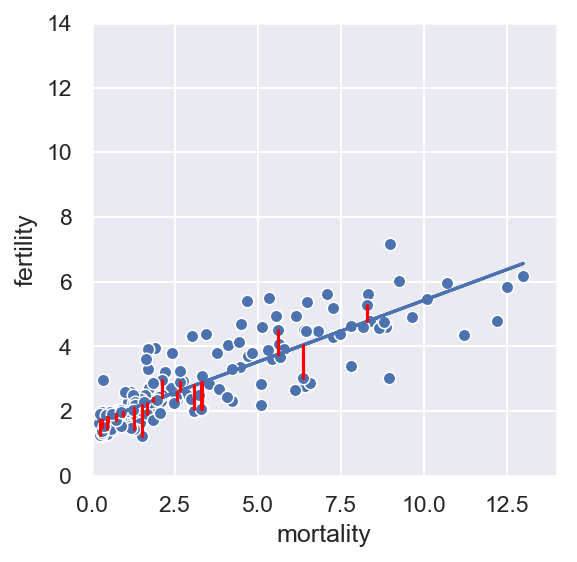

In [15]:
x, y = data['mortality'], data['fertility']
slope_x, intercept_x = np.polyfit(x, y, 1)

scatter()
plt.plot(x, slope_x * x + intercept_x)
for _, row in data.sample(20).iterrows():
    x, y = row['mortality'], row['fertility']
    plt.plot([x, x], [slope_x * x + intercept_x, y], c='red')

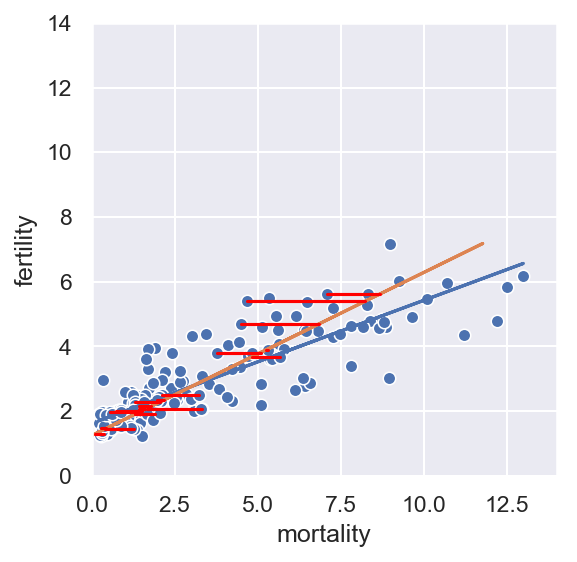

In [16]:
x, y = data['mortality'], data['fertility']
slope_y, intercept_y = np.polyfit(y, x, 1)

scatter()
plt.plot(x, slope_x * x + intercept_x)
plt.plot(slope_y * y + intercept_y, y)
for _, row in data.sample(20).iterrows():
    x, y = row['mortality'], row['fertility']
    plt.plot([x, slope_y * y + intercept_y], [y, y], c='red')

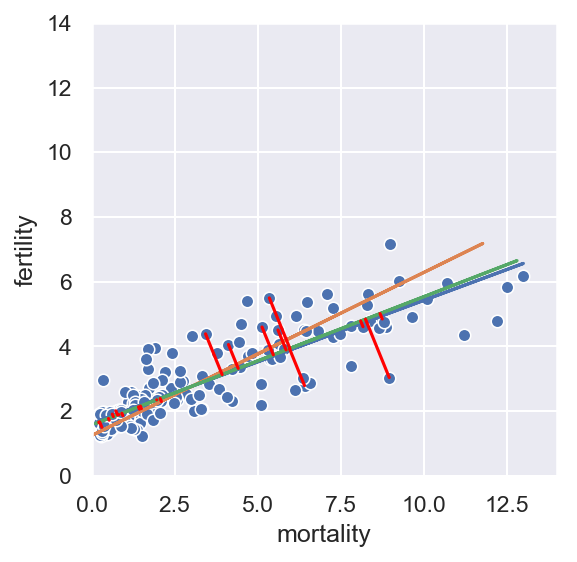

In [27]:
D = data.values
means = np.mean(D, axis=0)
rows = D.shape[0]
X = (D - means) / np.sqrt(rows)
u, s, vt = np.linalg.svd(X, full_matrices=False)
line = u * np.array([s[0], 0]) @ vt * np.sqrt(rows) + means

x, y = data['mortality'], data['fertility']
scatter()
plt.plot(x, slope_x * x + intercept_x)
plt.plot(slope_y * y + intercept_y, y)
plt.plot(line[:, 0], line[:, 1])

for i, row in data.reset_index().sample(20).iterrows():
    x, y = row['mortality'], row['fertility']
    xp, yp = line[i, :]
    plt.plot([x, xp], [y, yp], c='red')

In [59]:
from ipywidgets import interact

def scale(a):
    scatter()
    sns.scatterplot(data['mortality'] - a * (line[:, 0] - means[0]), 
                    data['fertility'] - a * (line[:, 1] - means[1]))
    plt.plot(line[:, 0], line[:, 1]);

interact(scale, a=(0, 1, 0.1));

interactive(children=(FloatSlider(value=0.0, description='a', max=1.0), Output()), _dom_classes=('widget-inter…